In [1]:
pip install git+https://github.com/google-research/timesfm


  Cloning https://github.com/google-research/timesfm to /tmp/pip-req-build-_mpqujaa
  Running command git clone --filter=blob:none --quiet https://github.com/google-research/timesfm /tmp/pip-req-build-_mpqujaa
  Resolved https://github.com/google-research/timesfm to commit 2a0aa074abd72fc1a42016a2e42adf1f0249dd53
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.2/440.2 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.5/772.5 kB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.4/101.4 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.8/686.8 kB 61.1 MB/s eta 0:00:00
     ━━━━━━━━

In [1]:
!pip install yfinance
!pip install utilsforecast


# get 3 years forcast 10 day next

In [ ]:
import yfinance as yf

# Fetch historical data for Apple
ticker = 'AAPL'
data = yf.download(ticker, start="2020-01-01", end="2024-01-01")

# Display the first few rows of the dataset
print(data.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.960464  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.251144  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.826843  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.484352  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.650352  132079200


In [ ]:
import pandas as pd

# Select the 'Close' price as the feature for forecasting
data = data[['Close']]

# Reset index to use the date in the DataFrame
data.reset_index(inplace=True)

# Rename columns to match expected format
data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
data['unique_id'] = 'AAPL'  # Add a unique_id column

print(data.head())


          ds          y unique_id
0 2020-01-02  75.087502      AAPL
1 2020-01-03  74.357498      AAPL
2 2020-01-06  74.949997      AAPL
3 2020-01-07  74.597504      AAPL
4 2020-01-08  75.797501      AAPL


<ipython-input-3-637f45bdc8c6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
<ipython-input-3-637f45bdc8c6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['unique_id'] = 'AAPL'  # Add a unique_id column


In [ ]:
# Split into training and test sets
train_data = data[data['ds'] < '2023-12-22']
test_data = data[data['ds'] >= '2023-12-22']

print("Training data:")
print(train_data.tail())
print("Test data:")
print(test_data.head())


Training data:
             ds           y unique_id
996  2023-12-15  197.570007      AAPL
997  2023-12-18  195.889999      AAPL
998  2023-12-19  196.940002      AAPL
999  2023-12-20  194.830002      AAPL
1000 2023-12-21  194.679993      AAPL
Test data:
             ds           y unique_id
1001 2023-12-22  193.600006      AAPL
1002 2023-12-26  193.050003      AAPL
1003 2023-12-27  193.149994      AAPL
1004 2023-12-28  193.580002      AAPL
1005 2023-12-29  192.529999      AAPL


In [ ]:
import timesfm

# Initialize the model
tfm = timesfm.TimesFm(
    context_len=512,  # Maximum context length
    horizon_len=10,  # Forecasting the next 10 days
    input_patch_len=32,
    output_patch_len=128,
    num_layers=20,
    model_dims=1280,
    backend='gpu',  # Or 'jax'
)

# Load the pretrained model
tfm.load_from_checkpoint(repo_id="google/timesfm-1.0-200m")

# Perform inference on the training set to predict the test set
forecast_df = tfm.forecast_on_df(
    inputs=train_data,
    freq="D",
    value_name="y",
    num_jobs=-1,
)




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/5.73k [00:00<?, ?B/s]

(…)nts/checkpoint_1100000/metadata/metadata:   0%|          | 0.00/43.9k [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

(…)oint_1100000/descriptor/descriptor.pbtxt:   0%|          | 0.00/499 [00:00<?, ?B/s]

checkpoint:   0%|          | 0.00/814M [00:00<?, ?B/s]

Constructing model weights.


Constructed model weights in 4.69 seconds.
Restoring checkpoint from /root/.cache/huggingface/hub/models--google--timesfm-1.0-200m/snapshots/8775f7531211ac864b739fe776b0b255c277e2be/checkpoints.


ERROR:absl:For checkpoint version > 1.0, we require users to provide
          `train_state_unpadded_shape_dtype_struct` during checkpoint
          saving/restoring, to avoid potential silent bugs when loading
          checkpoints to incompatible unpadded shapes of TrainState.


Restored checkpoint in 1.50 seconds.
Jitting decoding.
Jitted decoding in 20.00 seconds.
Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


In [ ]:
print(forecast_df.head(10))

  unique_id         ds     timesfm  timesfm-q-0.1  timesfm-q-0.2  \
0      AAPL 2023-12-22  194.539230     190.541519     191.847153   
1      AAPL 2023-12-23  194.267654     188.924255     190.894394   
2      AAPL 2023-12-24  194.099487     187.639999     190.324539   
3      AAPL 2023-12-25  194.015656     186.286530     188.944901   
4      AAPL 2023-12-26  193.503830     184.804214     187.847168   
5      AAPL 2023-12-27  193.946121     184.271667     187.586960   
6      AAPL 2023-12-28  193.312897     183.192749     186.945068   
7      AAPL 2023-12-29  193.514633     182.654343     186.643143   
8      AAPL 2023-12-30  193.294647     181.520630     185.751587   
9      AAPL 2023-12-31  193.111084     180.972580     185.263763   

   timesfm-q-0.3  timesfm-q-0.4  timesfm-q-0.5  timesfm-q-0.6  timesfm-q-0.7  \
0     192.905991     193.696625     194.539230     195.032318     195.863022   
1     192.468979     193.418976     194.267654     195.207672     196.258621   
2     191.7

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

forecast_df = forecast_df[['ds', 'timesfm']]
forecast_df.rename(columns={'timesfm': 'y_predicted'}, inplace=True)
test_data = test_data[['ds', 'y']]
merged_df = pd.merge(test_data, forecast_df, on='ds')

# Step 6: Calculate Loss Metrics
mse = mean_squared_error(merged_df['y'], merged_df['y_predicted'])
mae = mean_absolute_error(merged_df['y'], merged_df['y_predicted'])

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 0.5525539565831423
Mean Absolute Error: 0.68818359375


<ipython-input-8-590fa2e84a59>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_df.rename(columns={'timesfm': 'y_predicted'}, inplace=True)


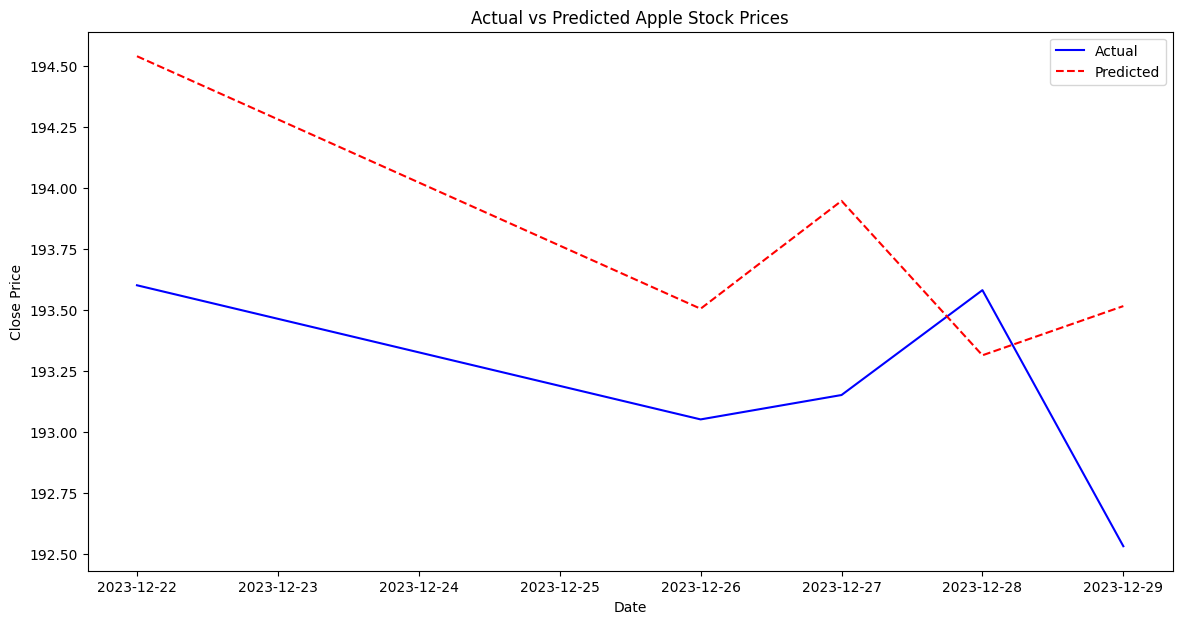

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(merged_df['ds'], merged_df['y'], label='Actual', color='blue')
plt.plot(merged_df['ds'], merged_df['y_predicted'], label='Predicted', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Apple Stock Prices')
plt.legend()
plt.show()


# forecast next day by one month

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import timesfm
import numpy as np

# Fetch historical data for Apple
ticker = 'AAPL'
data = yf.download(ticker, start="2020-01-01", end="2024-01-01")

# Select the 'Close' price as the feature for forecasting
data = data[['Close']]

# Reset index to use the date in the DataFrame
data.reset_index(inplace=True)

# Rename columns to match expected format
data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
data['unique_id'] = 'AAPL'  # Add a unique_id column

# Initialize the model
tfm = timesfm.TimesFm(
    context_len=512,  # Maximum context length
    horizon_len=1,  # Forecasting the next day
    input_patch_len=32,
    output_patch_len=128,
    num_layers=20,
    model_dims=1280,
    backend='gpu',  # Or 'jax'
)

# Load the pretrained model
tfm.load_from_checkpoint(repo_id="google/timesfm-1.0-200m")

# Function to predict the next day
def predict_next_day(train_data):
    forecast_df = tfm.forecast_on_df(
        inputs=train_data,
        freq="D",
        value_name="y",
        num_jobs=-1,
    )
    print('forecast_df.iloc[-1]',forecast_df)
    return forecast_df.iloc[-1]['timesfm']

# Splitting the data into rolling windows
start_date = '2023-01-01'
end_date = '2023-12-31'
window_size = 30

results = []

date_range = pd.date_range(start=start_date, end=end_date)

for i in range(len(date_range) - window_size):
    train_window_start = date_range[i]
    train_window_end = date_range[i + window_size - 1]
    predict_date = date_range[i + window_size]
    print('train_window_start',train_window_start,'train_window_end',train_window_end,'predict_date',predict_date)

    train_data = data[(data['ds'] >= train_window_start) & (data['ds'] <= train_window_end)]
    print('train_data',train_data)
    if predict_date not in data['ds'].values:
      print(f"Skipping prediction for {predict_date} as it's not in the data.")
      continue

    actual_value = data[data['ds'] == predict_date]['y'].values


    predicted_value = predict_next_day(train_data)
    results.append({'ds': predict_date, 'y_actual': actual_value[0], 'y_predicted': predicted_value})



[*********************100%%**********************]  1 of 1 completed
<ipython-input-16-2690e3375795>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
<ipython-input-16-2690e3375795>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['unique_id'] = 'AAPL'  # Add a unique_id column


Multiprocessing context has already been set.


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing model weights.


Constructed model weights in 3.62 seconds.
Restoring checkpoint from /root/.cache/huggingface/hub/models--google--timesfm-1.0-200m/snapshots/8775f7531211ac864b739fe776b0b255c277e2be/checkpoints.


ERROR:absl:For checkpoint version > 1.0, we require users to provide
          `train_state_unpadded_shape_dtype_struct` during checkpoint
          saving/restoring, to avoid potential silent bugs when loading
          checkpoints to incompatible unpadded shapes of TrainState.


Restored checkpoint in 0.61 seconds.
Jitting decoding.


KeyboardInterrupt: 

In [ ]:
len(results)

231

In [ ]:
import pandas as pd

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save DataFrame to CSV file
results_df.to_csv('prediction_results.csv', index=False)

print("Results saved to prediction_results.csv")


Results saved to prediction_results.csv


Overall Mean Squared Error: 7.127781829473188
Overall Mean Absolute Error: 2.090915366168662


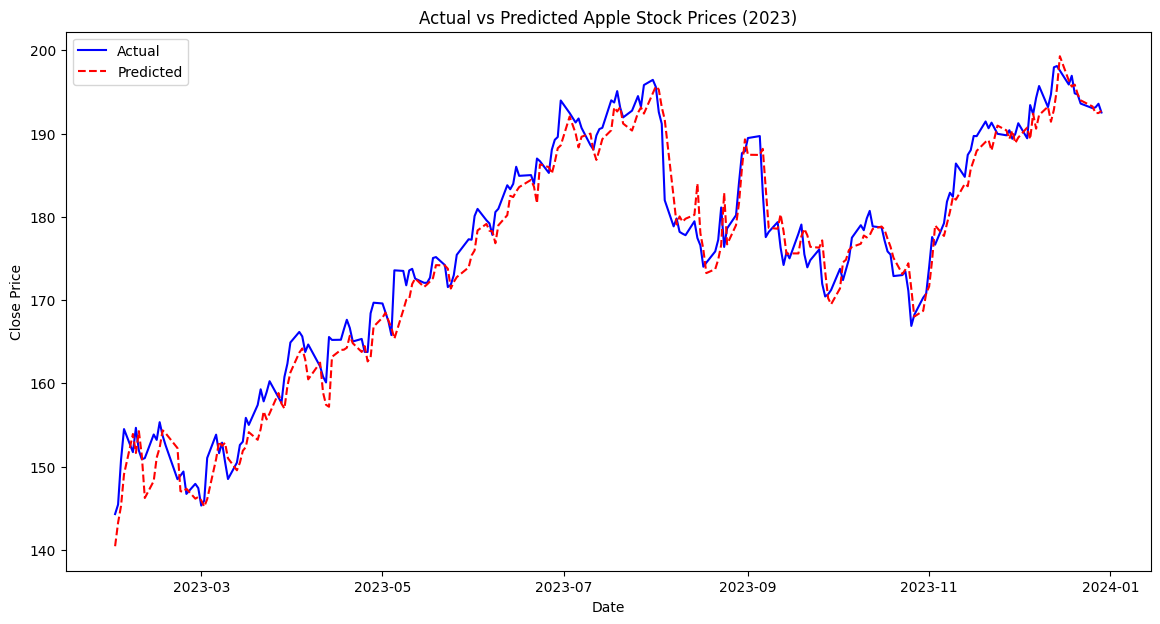

In [ ]:
# Create a DataFrame from results
results_df = pd.DataFrame(results)

# Calculate overall accuracy
mse = mean_squared_error(results_df['y_actual'], results_df['y_predicted'])
mae = mean_absolute_error(results_df['y_actual'], results_df['y_predicted'])

print(f'Overall Mean Squared Error: {mse}')
print(f'Overall Mean Absolute Error: {mae}')

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(results_df['ds'], results_df['y_actual'], label='Actual', color='blue')
plt.plot(results_df['ds'], results_df['y_predicted'], label='Predicted', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Apple Stock Prices (2023)')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Read the CSV file containing the results
results_df = pd.read_csv('t.csv')

# Initialize variables for accuracy calculation
correct_predictions = 0
total_predictions = 0

# Iterate through each row in the DataFrame
for i in range(1, len(results_df)):
    # Get actual and predicted prices for the current and previous days
    actual_today = results_df.iloc[i]['y_actual']
    predicted_today = results_df.iloc[i]['y_predicted']
    actual_yesterday_index = i - 1
    actual_yesterday_date = results_df.iloc[actual_yesterday_index]['ds']

    # Check if the date of the previous row is the previous day of the current row
    if pd.to_datetime(actual_yesterday_date) != pd.to_datetime(results_df.iloc[i]['ds']) - pd.DateOffset(days=1):
        continue  # Skip this row if the previous date is not the previous day

    actual_yesterday = results_df.iloc[actual_yesterday_index]['y_actual']

    # Calculate actual and predicted movements
    actual_movement = actual_today - actual_yesterday
    predicted_movement = predicted_today - actual_yesterday  # We use yesterday's actual price as reference

    # Check if the directions of actual and predicted movements match
    if (actual_movement > 0 and predicted_movement > 0) or (actual_movement < 0 and predicted_movement < 0):
        correct_predictions += 1

    total_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / total_predictions
print("Accuracy based on price movements:", accuracy)


Accuracy based on price movements: 0.4485294117647059


In [ ]:
total_predictions

136

# forecast 10 day by 30 day

In [2]:


import yfinance as yf
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import timesfm
import numpy as np

# Fetch historical data for Apple
ticker = 'AAPL'
data = yf.download(ticker, start="2020-01-01", end="2024-01-01")

# Select the 'Close' price as the feature for forecasting
data = data[['Close']]

# Reset index to use the date in the DataFrame
data.reset_index(inplace=True)

# Rename columns to match expected format
data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
data['unique_id'] = 'AAPL'  # Add a unique_id column

# Initialize the model
tfm = timesfm.TimesFm(
    context_len=512,  # Maximum context length
    horizon_len=10,  # Forecasting the next 10 days
    input_patch_len=32,
    output_patch_len=128,
    num_layers=20,
    model_dims=1280,
    backend='gpu',  # Or 'jax'
)

# Load the pretrained model
tfm.load_from_checkpoint(repo_id="google/timesfm-1.0-200m")

# Function to predict the next 10 days
def predict_next_days(train_data):
    forecast_df = tfm.forecast_on_df(
        inputs=train_data,
        freq="D",
        value_name="y",
        num_jobs=-1,
    )
    print("forecast_df",forecast_df)
    print("forecast_df.iloc[-1]['timesfm'] ",forecast_df.iloc[-1]['timesfm'] )
    return forecast_df.iloc[-1]['timesfm']  # Predict only the last day in the forecast horizon

# Splitting the data into rolling windows
start_date = '2023-01-01'
end_date = '2023-12-31'
window_size = 30
prediction_horizon = 10

results = []

date_range = pd.date_range(start=start_date, end=end_date)

for i in range(len(date_range) - window_size - prediction_horizon):
    train_window_start = date_range[i]
    train_window_end = date_range[i + window_size - 1]
    predict_date = date_range[i + window_size + prediction_horizon - 1]

    train_data = data[(data['ds'] >= train_window_start) & (data['ds'] <= train_window_end)]
    print('train_data',train_data)
    print('predict_date',predict_date)

    if predict_date not in data['ds'].values:
        print(f"Skipping prediction for {predict_date} as it's not in the data.")
        continue

    actual_value = data[data['ds'] == predict_date]['y'].values[0]

    predicted_value = predict_next_days(train_data)
    results.append({'ds': predict_date, 'y_actual': actual_value, 'y_predicted': predicted_value})


[*********************100%%**********************]  1 of 1 completed
<ipython-input-2-f1274745c1a2>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
<ipython-input-2-f1274745c1a2>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['unique_id'] = 'AAPL'  # Add a unique_id column
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your setti

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

(…)nts/checkpoint_1100000/metadata/metadata:   0%|          | 0.00/43.9k [00:00<?, ?B/s]

(…)oint_1100000/descriptor/descriptor.pbtxt:   0%|          | 0.00/499 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.73k [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

checkpoint:   0%|          | 0.00/814M [00:00<?, ?B/s]

Constructing model weights.


Constructed model weights in 3.43 seconds.
Restoring checkpoint from /root/.cache/huggingface/hub/models--google--timesfm-1.0-200m/snapshots/8775f7531211ac864b739fe776b0b255c277e2be/checkpoints.


ERROR:absl:For checkpoint version > 1.0, we require users to provide
          `train_state_unpadded_shape_dtype_struct` during checkpoint
          saving/restoring, to avoid potential silent bugs when loading
          checkpoints to incompatible unpadded shapes of TrainState.


Streaming output truncated to the last 5000 lines.
924 2023-09-05  189.699997      AAPL
925 2023-09-06  182.910004      AAPL
926 2023-09-07  177.559998      AAPL
927 2023-09-08  178.179993      AAPL
928 2023-09-11  179.360001      AAPL
929 2023-09-12  176.300003      AAPL
predict_date 2023-09-22 00:00:00
Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
forecast_df   unique_id         ds     timesfm  timesfm-q-0.1  timesfm-q-0.2  \
0      AAPL 2023-09-13  178.269257     175.519989     176.532074   
1      AAPL 2023-09-14  180.502731     176.434921     177.816559   
2      AAPL 2023-09-15  181.539688     176.834457     178.295120   
3      AAPL 2023-09-16  180.516800     176.216187     177.647919   
4      AAPL 2023-09-17  178.053223     174.793289     175.695480   
5      AAPL 2023-09-18  176.141602     173.455109     174.420700   
6      AAPL 2023-09-19  174.825745     172.494629     173.408447   
7      AAPL 2023-09-20  174.997620  

In [3]:

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save DataFrame to CSV file
results_df.to_csv('prediction_results.csv', index=False)

print("Results saved to prediction_results.csv")


Results saved to prediction_results.csv


Overall Mean Squared Error: 75.60305809006552
Overall Mean Absolute Error: 7.26857989174979


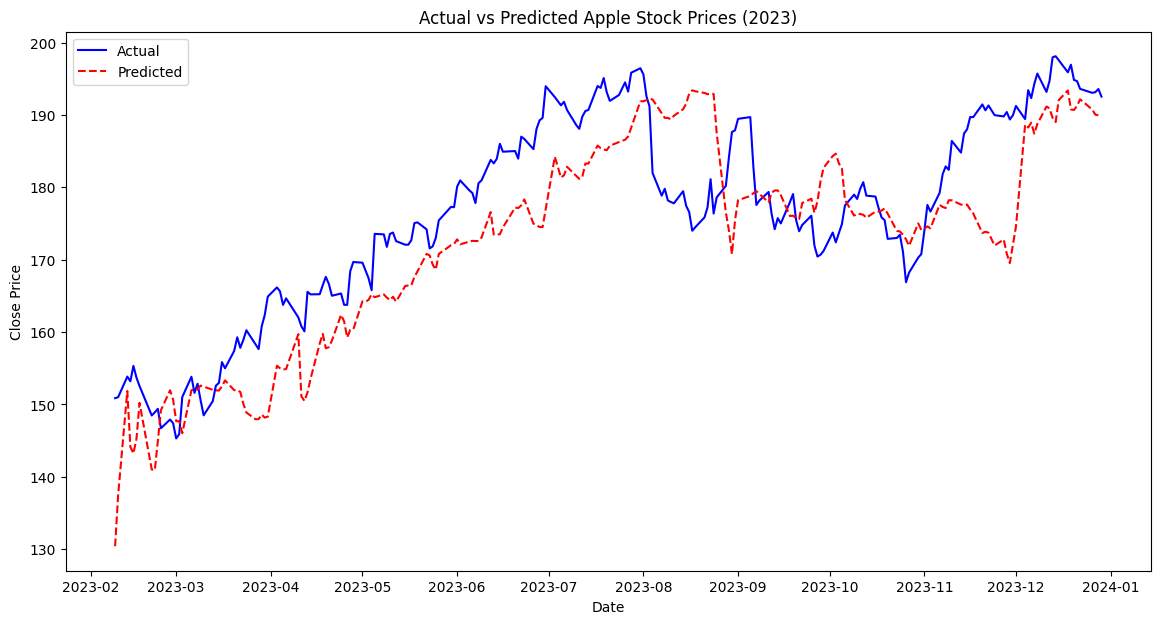

In [4]:

# Calculate overall accuracy
mse = mean_squared_error(results_df['y_actual'], results_df['y_predicted'])
mae = mean_absolute_error(results_df['y_actual'], results_df['y_predicted'])

print(f'Overall Mean Squared Error: {mse}')
print(f'Overall Mean Absolute Error: {mae}')

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(results_df['ds'], results_df['y_actual'], label='Actual', color='blue')
plt.plot(results_df['ds'], results_df['y_predicted'], label='Predicted', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Apple Stock Prices (2023)')
plt.legend()
plt.show()

In [5]:


# Calculate movement accuracy
correct_predictions = 0
total_predictions = 0

for i in range(1, len(results_df)):
    actual_today = results_df.iloc[i]['y_actual']
    predicted_today = results_df.iloc[i]['y_predicted']
    actual_yesterday_index = i - 1
    actual_yesterday_date = results_df.iloc[actual_yesterday_index]['ds']

    if pd.to_datetime(actual_yesterday_date) != pd.to_datetime(results_df.iloc[i]['ds']) - pd.DateOffset(days=1):
        continue

    actual_yesterday = results_df.iloc[actual_yesterday_index]['y_actual']

    actual_movement = actual_today - actual_yesterday
    predicted_movement = predicted_today - actual_yesterday

    if (actual_movement > 0 and predicted_movement > 0) or (actual_movement < 0 and predicted_movement < 0):
        correct_predictions += 1

    total_predictions += 1

accuracy = correct_predictions / total_predictions
print("Accuracy based on price movements:", accuracy)


Accuracy based on price movements: 0.4685714285714286
